# AVACADO PROJECT

## Importing Libreries

In [2]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [3]:
#Import the dataset

df= pd.read_csv(r"C:\Users\Chaitali Nakade\OneDrive\Desktop\dataset\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [4]:
df.shape

(18249, 14)

There are 18249 Rows and 14 Columns in dataset

## Detailed description

In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns

In [6]:
#check the data types of all the columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We have object(string) datatype in Date, type and region column which are catogorical values. Integer data type in unnamed:0 and year columns. and rest are floating values.

### All are independent variable accept AveragePrice.
### AveragePrice is a target variable.

## Checking is there any null value in dataset

In [7]:
#check is there any null value present in any column

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing value in whole dataset.
As we see no null values present, now it's safe to preceed.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can see the complete information about data frame

In [9]:
df["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [10]:
df.loc[df['AveragePrice']== " "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


As we see there are no missing or spaces are available in target variable.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1. Distplot

In [11]:
fe = df[['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags', 'year']]

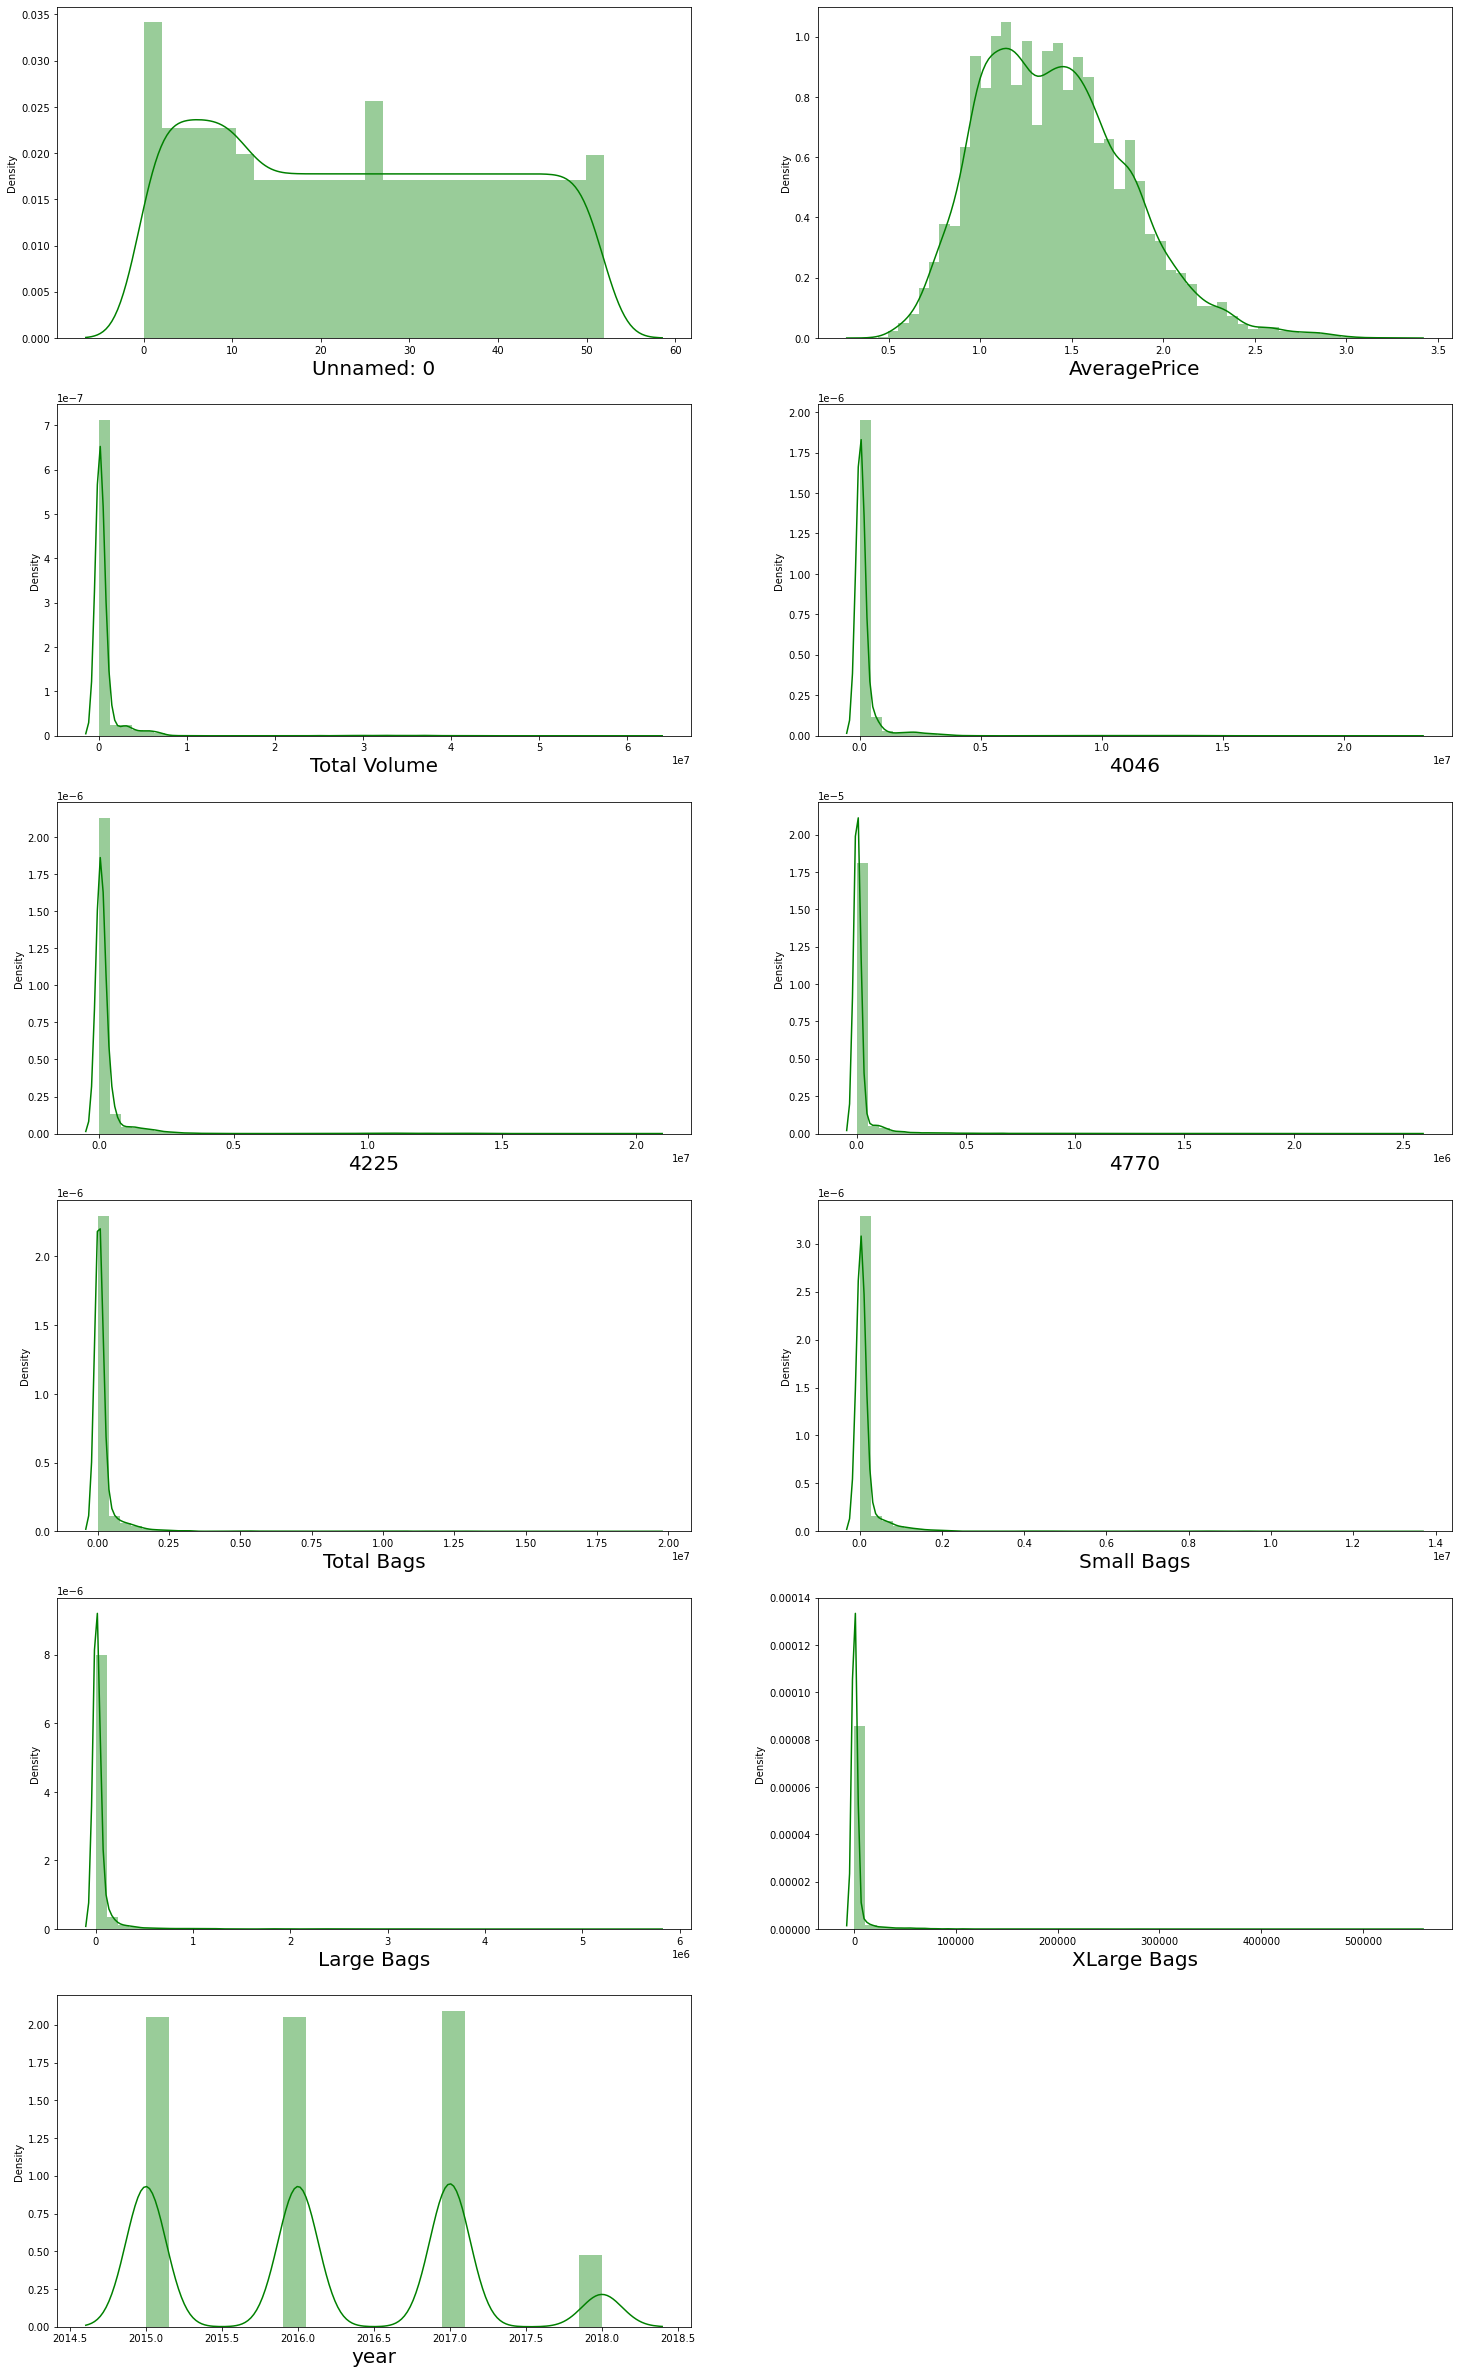

In [12]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 13: # as we see there are eight columns in the data
        ax = plt.subplot(7,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we can see almost every column is having skewness in it :
1. Total Volume 
2. 4046
3. 4225
4. 4770
5. Total Bags
6. Small Bags
7. Large Bags
8. XLarge Bags
accept year and unnamed:0, they both are categoriacal column and AveragePrice is targate variable.

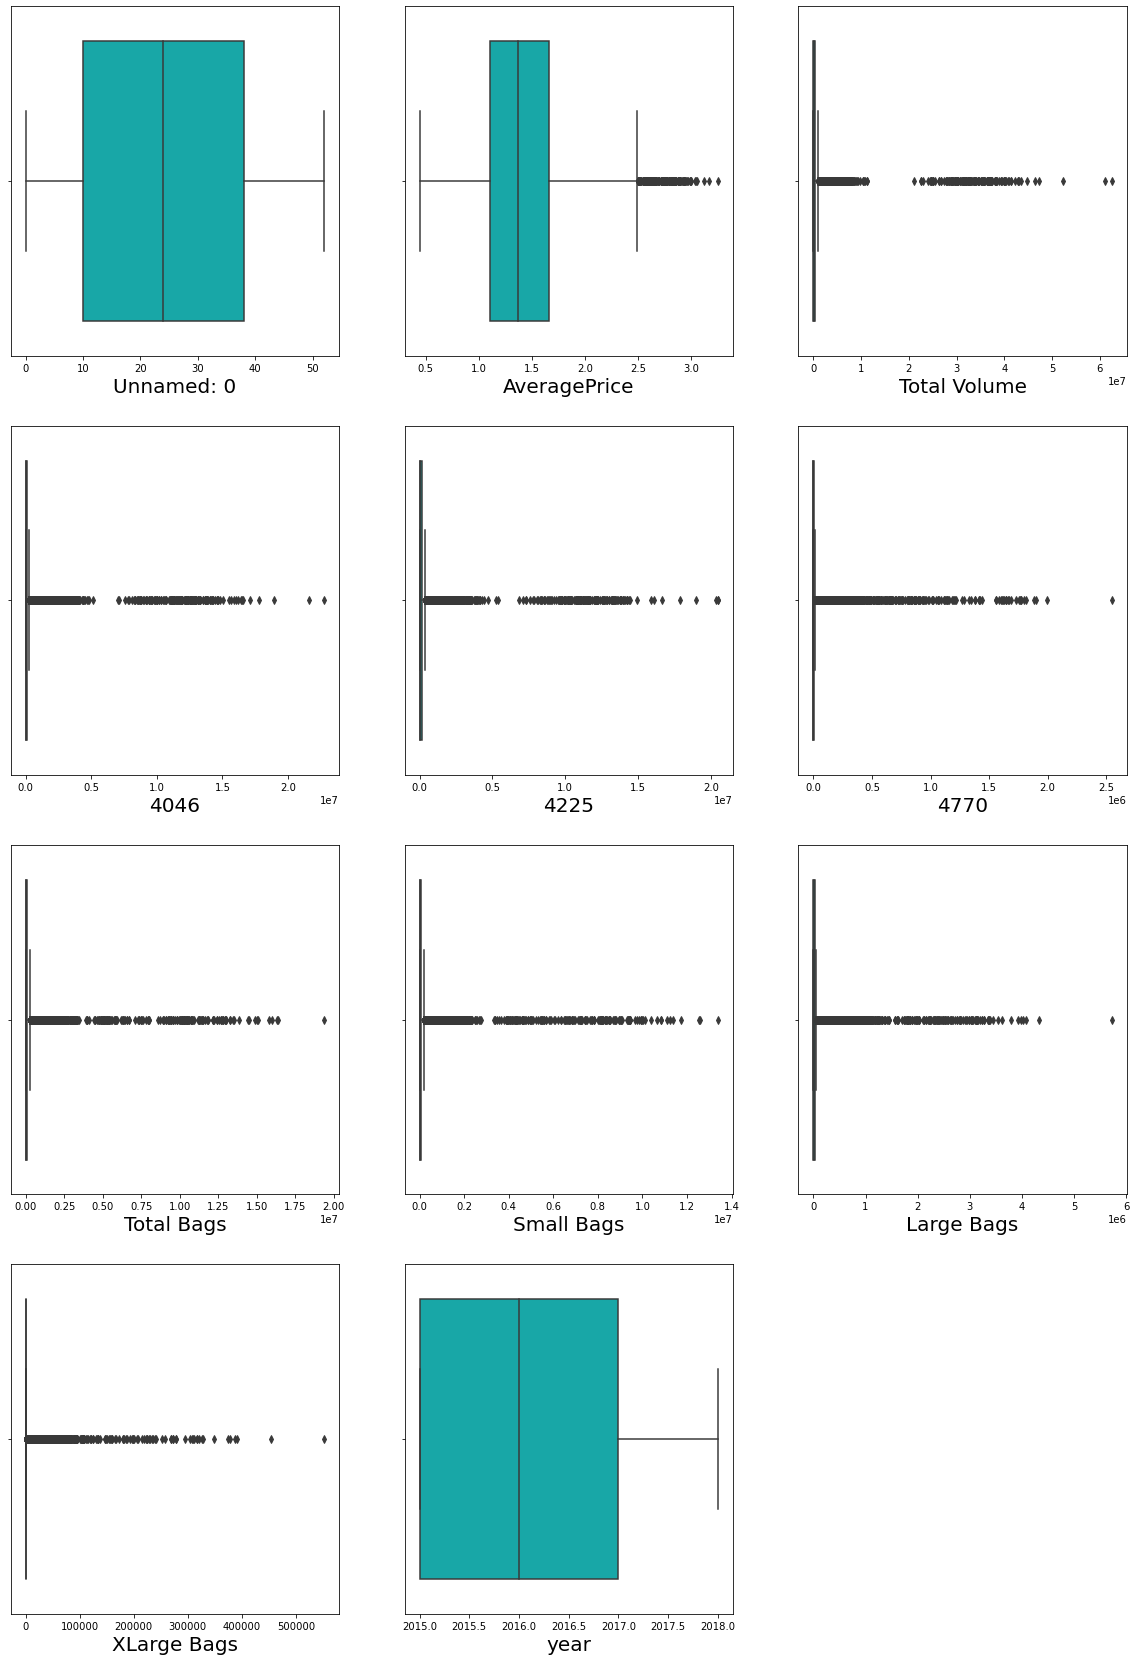

In [13]:
#Relationship Visualizing

plt.figure(figsize = (20,45), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,3,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

##### Every column contains outliers( 'Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags'), we need to remove outliers from that.

In [14]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [15]:
visualization = df[['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags', 'year', 'region']].copy()

In [16]:
visualization.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

##### 4. Countplot

0         0
1         1
2         2
3         3
4         4
         ..
18244     7
18245     8
18246     9
18247    10
18248    11
Name: Unnamed: 0, Length: 18249, dtype: int64


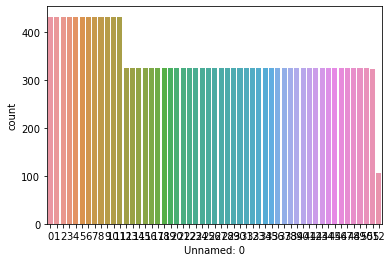

In [17]:
ax = sn.countplot(x="Unnamed: 0", data = visualization)
print(visualization["Unnamed: 0"])

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


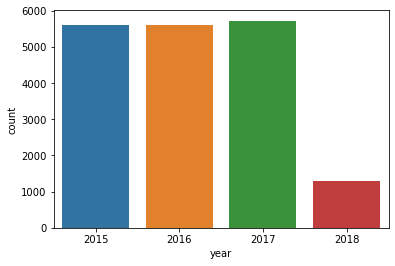

In [18]:
ax = sn.countplot(x="year", data = visualization)
print(visualization["year"].value_counts())

## Bi variate analysis
Bi variate analysis is works with two variables.

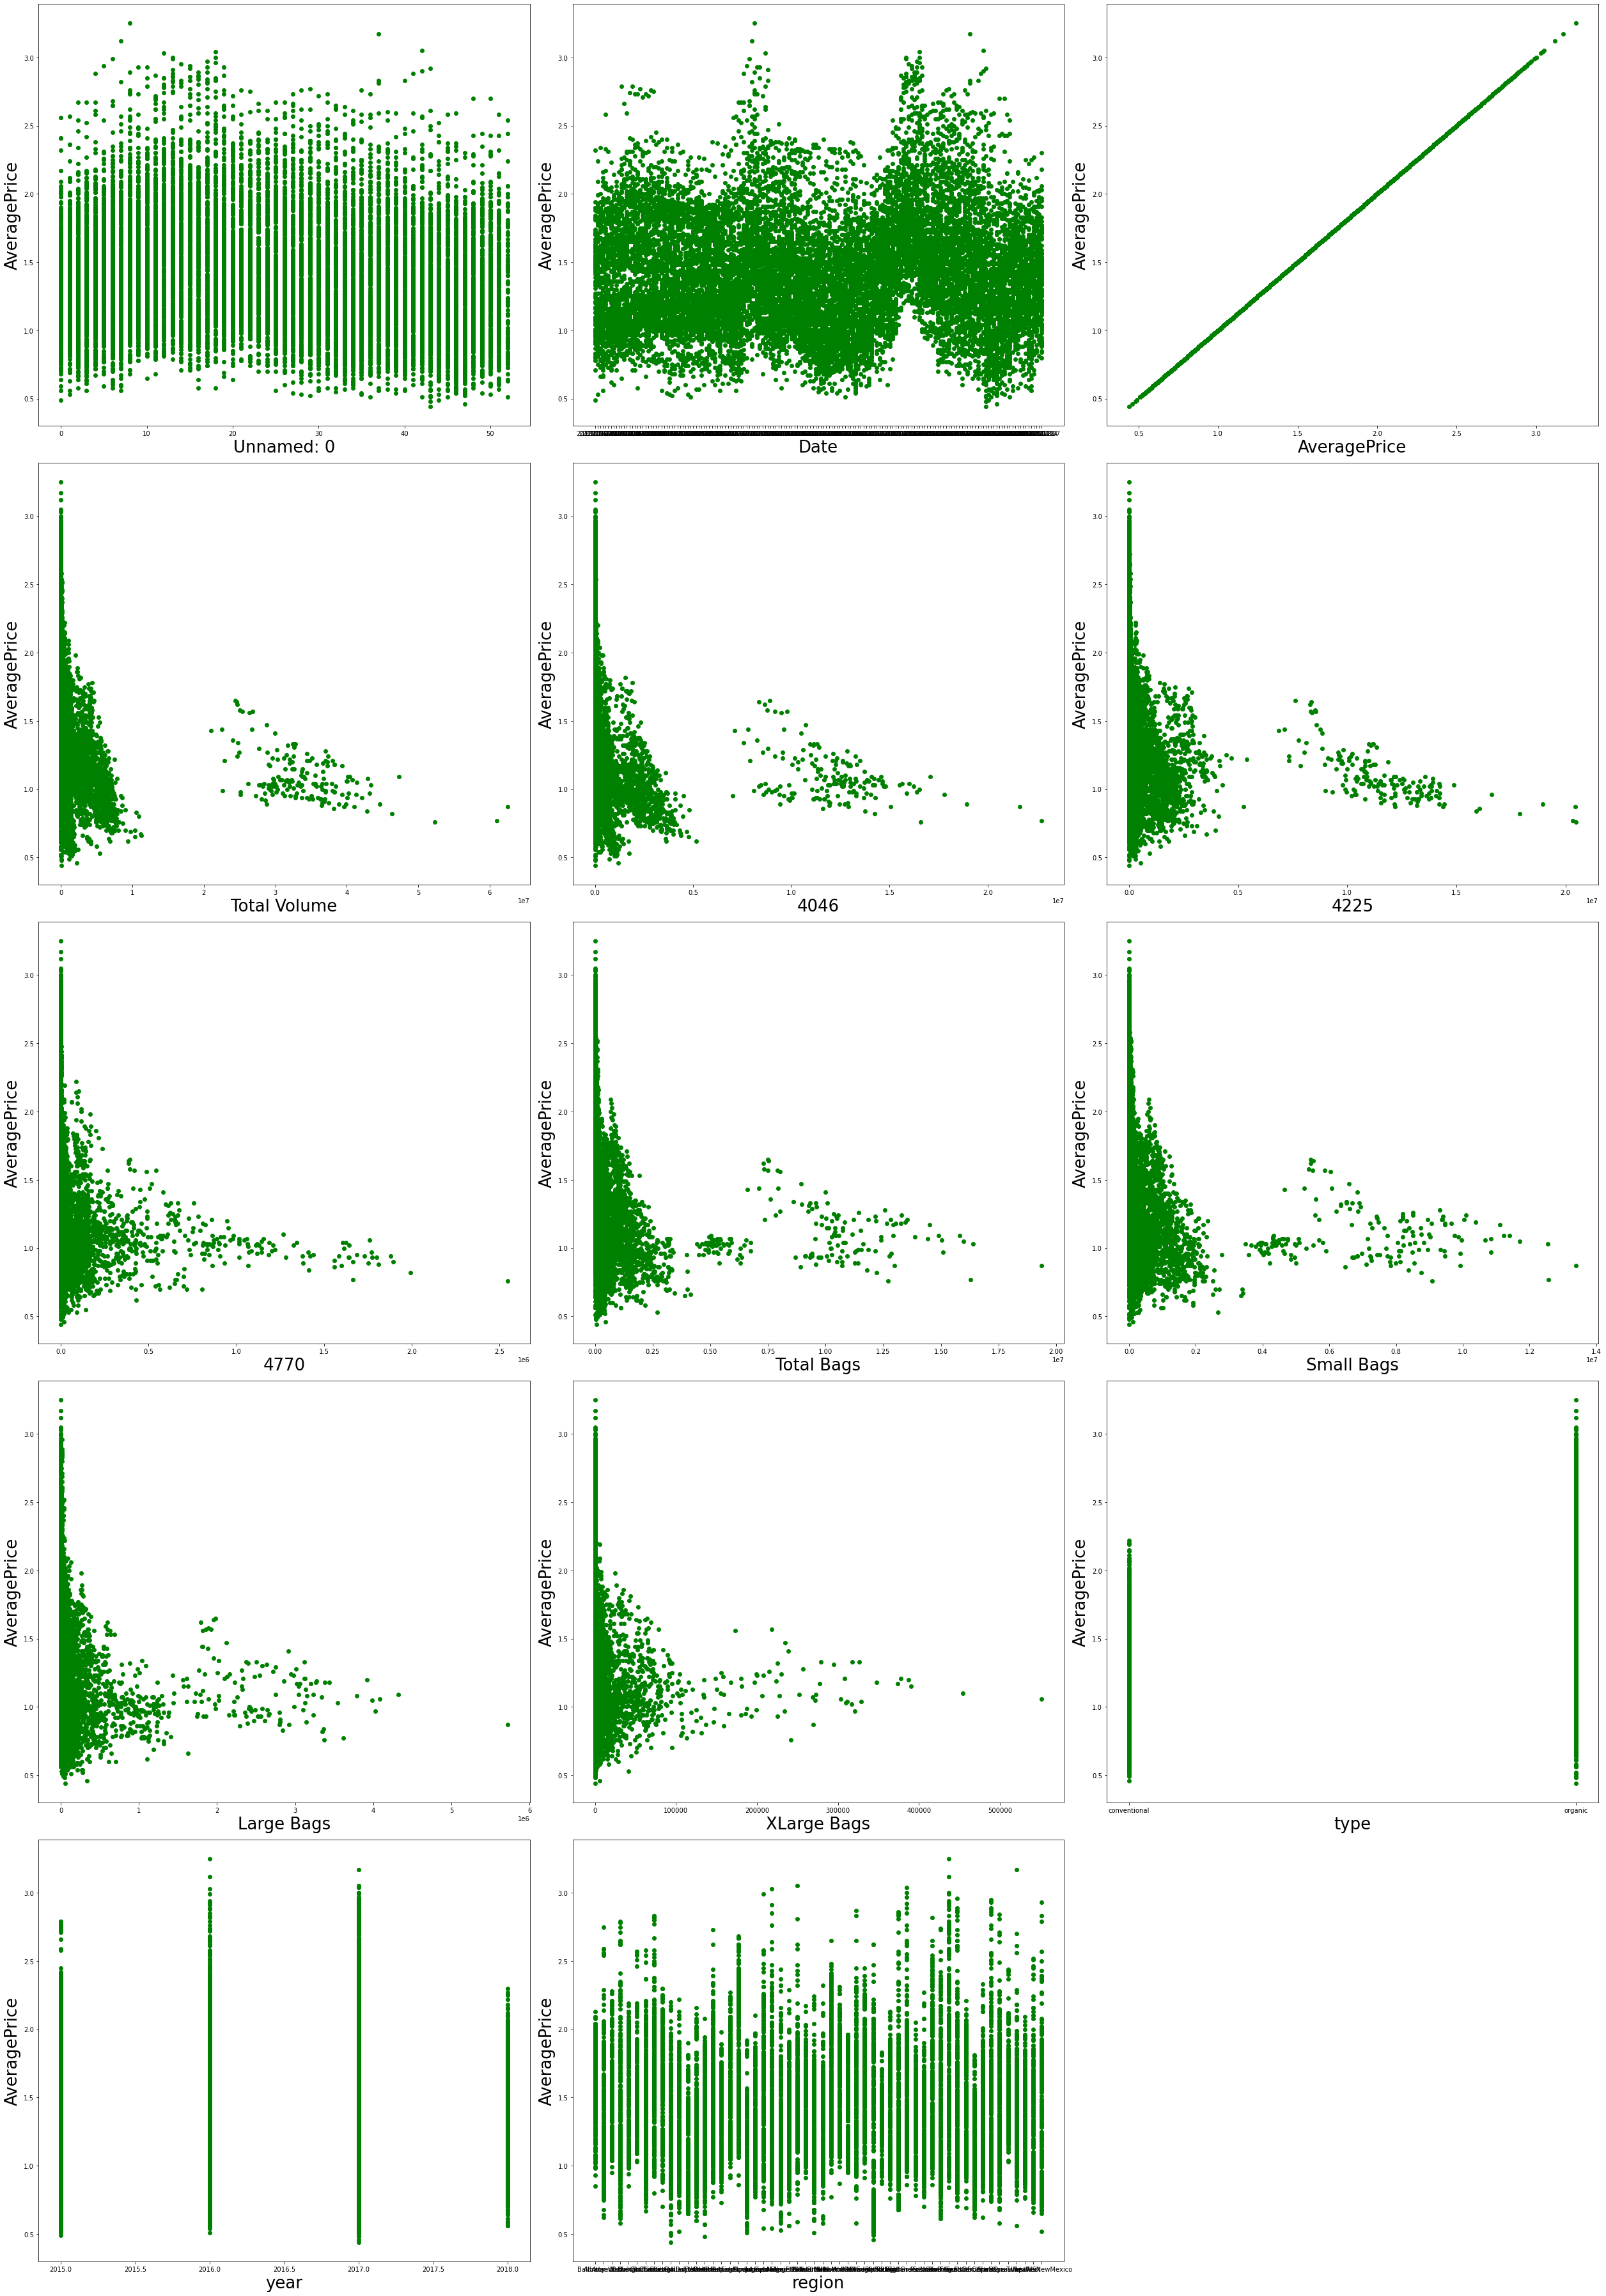

In [19]:
#Relationship Visualizing

plt.figure(figsize = (35,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['AveragePrice'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('AveragePrice', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen ther is no linear relationship with targate variable and in the plot some outliers are also present in it.
The value of targate variable is getting high is at minimum input value in so many independent variable.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

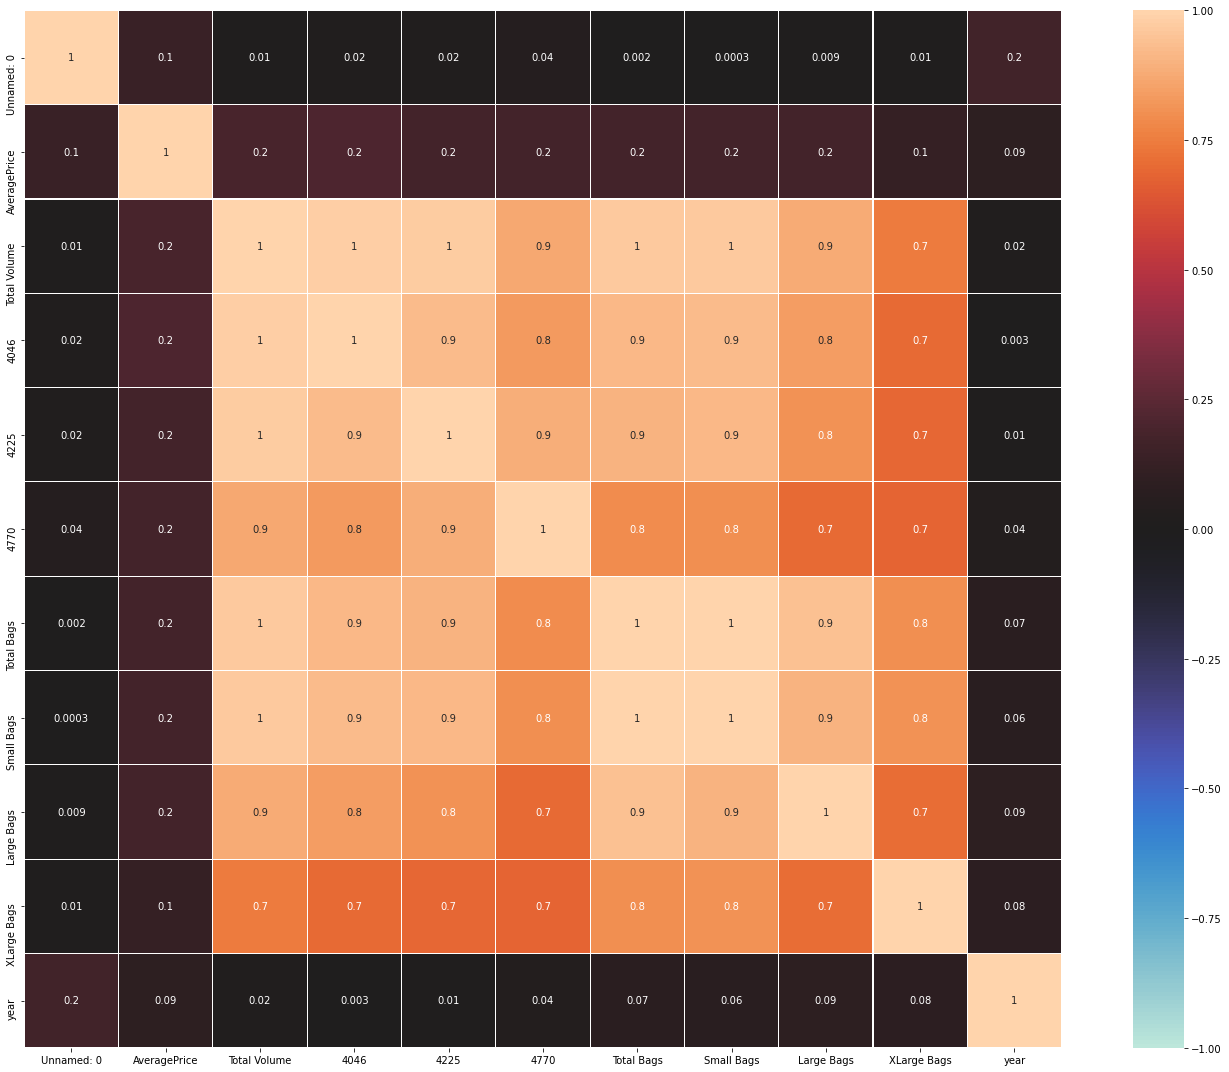

In [20]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot 'Averageprice' is strongly correted with 'Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags.

unnamed:0 column is weekly correlated with so many input variables.

total volumn is strongly correlated with so many input variables.

targate variable is weekly correlated with year column.

In [ ]:
sn.pairplot(df)
plt.show()

##### Find out which columns are positively and negatively correlated with each other

In [ ]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('AveragePrice', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot only year features are positively correlate with target variabl other than that all are no negativly correlation in it.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

## Encoding
#### In avocado data set we are having 2 variables which we need to encode
1. type
2. region

In [ ]:
df

## Extract date column

In [ ]:
df['Date'].unique()

In [ ]:
df['Date'].value_counts()

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

we can see the data type of date column change from oject to datetime. Now, we can axtract it.

In [ ]:
df["Year"] = df["Date"].dt.year

In [ ]:
df["Month"] = df["Date"].dt.month

In [ ]:
df["Day"] = df["Date"].dt.day

In [ ]:
df

In [ ]:
#drop Date column
df=df.drop(['Date'], axis=1)

### After obsevation we came to know that the Year from Date column and the year column from data frame is having same values so we can drop any one column from that

In [ ]:
#drop year column
df=df.drop(['year'], axis=1)

#### 1. Encoding type column

In [ ]:
df['type'].unique()

There are 2 unique values present in type column.

In [ ]:
df['type'].value_counts()

Number of count of each unique value.

In [ ]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df #after encoding of type column

#### 3. Drop Unnamed: 0 column

In [ ]:
df['Unnamed: 0'].unique()

In [ ]:
#drop unnamed column
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
#after encoding and droping some columns the dataframe will look
df

In [ ]:
df

output with only one year column.

### Visualization after encoding the column

In [ ]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('AveragePrice', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

In [ ]:
df=df.drop(['region'], axis=1)

## Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [ ]:
df.dtypes

In [ ]:
df

## 1.Outlier removal using Zscore

In [ ]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags', 'region', 'Year', 'Month', 'Day']])
#
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

2.559% data will loss after applying Zscore technique.

In [ ]:
17782/18249

97.44% data remains after aplying zscore technique.

In [ ]:
new_df.describe()

97.44% data remains after using Zscore outlier technique.

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side

In [ ]:
df2 = df

In [ ]:
#features in which outliers are detected
fe = df2[['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags']]

In [ ]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(4,2, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [ ]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [ ]:
df2.describe()

## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)

##### As we have seen in boxplot outliers are present only in higher side so, we go with higher side formula only

##### Outliers removal from higher side 

In [ ]:
#Check the Outliers for total volumn
#Remove outliers from higher side so, use higher side formula

volume_out = (4.329623e+05 + (1.5*(4.329623e+05-1.083858e+04)))
volume_out

In [ ]:
index_out = np.where(df2['Total Volume'] > volume_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 15952 rows will remains in dataframe. 

In [ ]:
# 4046 is having outliers in higher side so use higher side formula
#Check the Outliers for 4046

foursix_out = (1.110202e+05 + (1.5*(1.110202e+05 - 8.540700e+02)))
foursix_out

In [ ]:
index_out = np.where(df['4046'] > foursix_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 13434 rows will remains in dataframe. 

In [ ]:
# 4225 is having outliers in lower side so use lower side formula
#Check the Outliers for 4225
#Remove outliers from lower side so, use lower side formula

twofive_out = (1.502069e+05 + (1.5*(1.502069e+05 - 3.008780e+03)))
twofive_out

In [ ]:
index_out = np.where(df2['4225'] > twofive_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 12923 rows will remains in dataframe.

In [ ]:
#as shown in boxplot we have outlier in higher side of 4770 
#Remove outliers from higher side so, use higher side formula

seven0_out = (6.243420e+03 + (1.5*(6.243420e+03 - 0.000000e+00)))
seven0_out

In [ ]:
index_out = np.where(df2['4770'] > seven0_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 12220 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are 12220 rows will remains in dataset.
Now, find how much data loss in IQR method

In [ ]:
((18249-12220)/18249)

33.03 % data loss after using IQR technique.

In [ ]:
(12220/18249)*100

66.96% data remains.

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [ ]:
new_df.skew()

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

1. Total Volume
2. 4046
3. 4225
4. 4770
5. Total Bags
6. Small Bags 
7. Large Bags 
8. XLarge Bags

In [ ]:
new_df.dtypes

## Apply Log transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [ ]:
#applying log transformation on skewed columns

new_df['Total Volume'] = np.log1p(new_df['Total Volume'])
new_df['4046'] = np.log1p(new_df['4046'])
new_df['4225'] = np.log1p(new_df['4225'])
new_df['4770'] = np.log1p(new_df['4770'])
new_df['Total Bags'] = np.log1p(new_df['Total Bags'])
new_df['Small Bags'] = np.log1p(new_df['Small Bags'])
new_df['Large Bags'] = np.log1p(new_df['Large Bags'])
new_df['XLarge Bags'] = np.log1p(new_df['XLarge Bags'])

after applying log transformation visualize the output of log transformation

In [ ]:
sn.distplot(new_df["Total Volume"], color = 'g')     

In [ ]:
sn.distplot(new_df["4046"], color = 'g')     

In [ ]:
sn.distplot(new_df["4225"], color = 'g')     

In [ ]:
sn.distplot(new_df["4770"], color = 'g')     

In [ ]:
sn.distplot(new_df["Total Bags"], color = 'g')     

In [ ]:
sn.distplot(new_df["Small Bags"], color = 'g')     

In [ ]:
sn.distplot(new_df["Large Bags"], color = 'g')     

In [ ]:
sn.distplot(new_df["XLarge Bags"], color = 'g')     

As shown in plot skewness removes after using log transformation skewness removal.

In [ ]:
new_df.skew()

### after using log transformation we can see the skewness of maximum columns get reduces but still some column is having skewness in it, now work on that and remove skewness.

## Seperating the columns into featuers and target:

#### x= features, y=Target 

In [ ]:
x = new_df.drop(columns = 'AveragePrice', axis=1)
y = new_df['AveragePrice']

## Scalling technique

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [ ]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

as we have saw in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multiclinearity issue.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 77)

# 1.Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

In [ ]:
pred_test=Lr.predict(x_test)

In [ ]:
print(r2_score(y_test,pred_test))

## Cross Validation of Linear Regression 

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

In [ ]:
cdc

## Regularization 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

In [ ]:
ls = Lasso(alpha = 0.0001, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

In [ ]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The r2 score for linear regression model is : 52.50%
###### Cross validation score for linear regression is : 35.26%

# 2.Random Forest Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

In [ ]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

###### The r2 score for Random Forest Regressor model is : 53.07%
###### Cross validation score for Random Forest Regressor is : 50.07%

## 3.Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

In [ ]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

In [ ]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The r2 score for Decision tree regression model is : 14.02%
###### Cross validation score for Decision tree regression is : 25.57% 

## 4.Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

In [ ]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

In [ ]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

## Compare all models

The diffrence between r2 score and cross validation score of linear regression model is : 17.24%

The diffrence between r2 score and cross validation score Random Forest Regressor model is : 3%

The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 11.55%

The diffrence between r2 score and cross validation score of SVR model is : 10.32%

### So, best model is Random Forest Regressor.

## Hyper parameter tunning

In [ ]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [ ]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

In [ ]:
mod = RandomForestRegressor( criterion='mse', max_depth=7 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

after hyper parameter tuning rendom forest regressor value is 52.92%

## Saving the model

In [ ]:
import pickle

In [ ]:
#creating binary file first

with open("model_pickle", "wb") as f:
    pickle.dump(Rfrc, f)

In [ ]:
#reading Bbinary file

with open("model_pickle","rb") as f:
    mp=pickle.load(f)

Model saved